# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0] = self.pos
        for i in range(1,n+1):
            positions[i] = positions[i-1] + self.pickStep()
        return positions

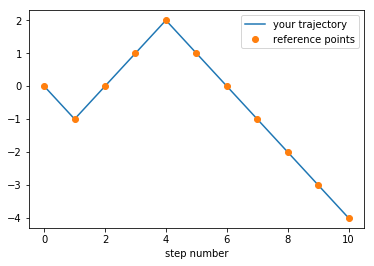

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

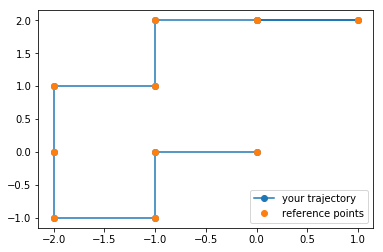

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

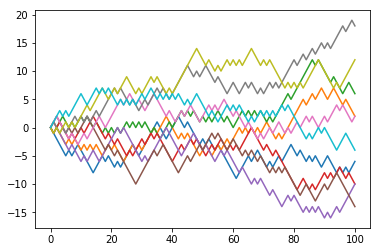

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


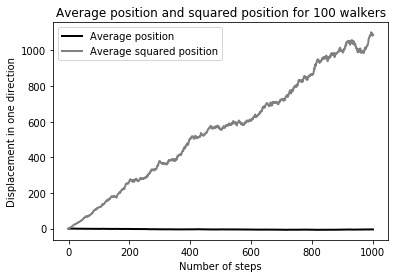

In [27]:
nsteps = 1000
ndim = 1
nwalkers = 100

allys = numpy.empty((nwalkers, nsteps+1))
averageys = numpy.empty((nsteps+1))
averagesquaredys = numpy.empty((nsteps+1))
for i in range(nwalkers):
    w = walker(numpy.zeros(ndim))
    ys = w.doSteps(nsteps)
    ysT = ys.T
    allys[i] = ysT


transpose = numpy.transpose(allys)
for i in range(nsteps+1):
    averageys[i] = numpy.average(transpose[i])
    averagesquaredys[i] = numpy.average(transpose[i]**2)   #need different equation for averagesquaredys i think
    
plt.plot(range(nsteps+1),averageys, label = "Average position", color = "black", linewidth = 2)  
plt.plot(range(nsteps+1),averagesquaredys, label = "Average squared position", color = "grey", linewidth = 2)
plt.xlabel("Number of steps")
plt.ylabel("Displacement in one direction")
plt.title("Average position and squared position for 100 walkers")
plt.legend(loc="best")

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


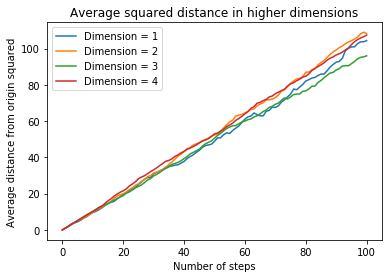

In [23]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

for j in dimensions:
    squaredcoords = numpy.empty((nwalkers,nsteps+1))
    averagesquareddistance = numpy.empty((nsteps+1))
    
    for i in range(nwalkers):
        w = walker(numpy.zeros(j), ndim = j)
        coordinates = w.doSteps(nsteps)
        coordinatesT = coordinates.T
        
        squaredcoords[i] = numpy.sum(coordinatesT**2, axis = 0)
    averagesquareddistance = numpy.average(squaredcoords, axis = 0) #plot this array each time instead of creating multiple
        
    plt.plot(range(nsteps+1), averagesquareddistance, label = "Dimension = %s" % j)

plt.title("Average squared distance in higher dimensions")
plt.xlabel("Number of steps")
plt.ylabel("Average distance from origin squared")
plt.legend(loc="best")

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


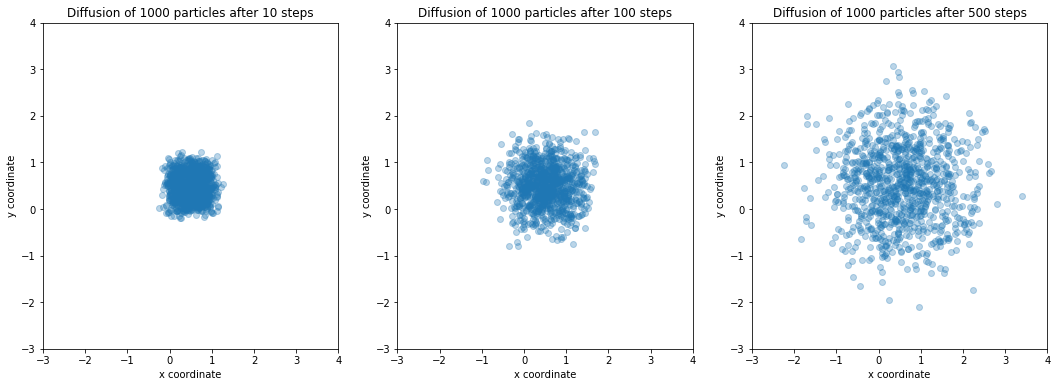

In [22]:
ndim=2
nwalkers=1000
step_size = 0.05

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    finalxypositions = numpy.empty((nwalkers,ndim)) #need final positions of each walker
    for j in range(nwalkers):
        w = walker(rand_pos[j], ndim, step_size)
        coords = w.doSteps(nsteps)
        finalxypositions[j] = coords[-1] #get the final position of each walker
        
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Diffusion of 1000 particles after %s steps" % nsteps) 
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.scatter(finalxypositions[:,0], finalxypositions[:,1], alpha=0.3)